In [182]:
import random, math, pylab,numpy as np

(array([[2.5, 0. , 0. , ..., 0. , 0. , 2.5],
        [2.5, 0. , 0. , ..., 0. , 0. , 2.5],
        [0. , 0. , 0. , ..., 0. , 0. , 5. ],
        ...,
        [2.5, 0. , 0. , ..., 0. , 0. , 2.5],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [2.5, 0. , 0. , ..., 0. , 0. , 2.5]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 1000 BarContainer objects>)

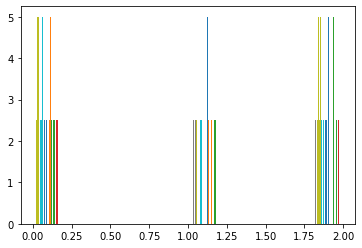

In [79]:
L = 3
t_max = 1000

ave=[]
for i in range(1000):
    site = [0, 0]
    for t in range(t_max):
        delta = random.choice([[1, 0], [0, 1], [-1, 0], [0, -1]])
        site[0] = (site[0] + delta[0]) % L
        site[1] = (site[1] + delta[1]) % L
    ave.append(site)
    
pylab.hist(ave,density=True)


In [81]:
L = 3
t_max = 1000
counts = {}
transitions = {}

for i in range(1024):
    site = [0, 0]
    for t in range(t_max):
        delta = random.choice([[1, 0], [0, 1], [-1, 0], [0, -1]])
        s0 = site[0]
        s1 = site[1]
        site[0] = (site[0] + delta[0]) % L
        site[1] = (site[1] + delta[1]) % L
        if (site[0],site[1]) in counts:
            counts [(site[0],site[1])]+=1
        else:
            counts [(site[0],site[1])]=1
        if (s0,s1,site[0],site[1]) in transitions:
            transitions[(s0,s1,site[0],site[1])]+=1
        else:
            transitions[(s0,s1,site[0],site[1])]=0
            
print(transitions)

{(0, 0, 0, 2): 28545, (0, 2, 2, 2): 28581, (2, 2, 2, 1): 28320, (2, 1, 0, 1): 28436, (0, 1, 0, 0): 28444, (0, 0, 1, 0): 28707, (1, 0, 0, 0): 28371, (0, 0, 2, 0): 28642, (2, 0, 1, 0): 28390, (2, 0, 2, 1): 28541, (0, 1, 2, 1): 28418, (2, 1, 1, 1): 28192, (1, 1, 2, 1): 28259, (1, 1, 0, 1): 28285, (1, 1, 1, 0): 28310, (1, 0, 2, 0): 28355, (2, 0, 0, 0): 28540, (0, 0, 0, 1): 28723, (2, 0, 2, 2): 28807, (2, 2, 2, 0): 28813, (0, 2, 1, 2): 28481, (1, 2, 1, 1): 28357, (0, 1, 0, 2): 28350, (0, 2, 0, 1): 28278, (0, 2, 0, 0): 28358, (0, 1, 1, 1): 28392, (2, 1, 2, 2): 28208, (1, 1, 1, 2): 28583, (1, 2, 1, 0): 28213, (1, 0, 1, 2): 28187, (1, 2, 0, 2): 28339, (2, 1, 2, 0): 28586, (2, 2, 0, 2): 28578, (1, 0, 1, 1): 28597, (2, 2, 1, 2): 28275, (1, 2, 2, 2): 28503}


In [91]:
N = 8
nsteps = 100
L = list(range(N))
for step in range(nsteps):
    i = random.randint(0, N - 1)
    j = random.randint(0, N - 1)
    L[i], L[j] = L[j], L[i]
    print (L[0])

7
7
7
7
7
6
1
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
3
3
3
3
3
1
1
0
0
4
4
4
4
6
6
6
6
6
2
6
1
1
1
1
1
1
7
7
7
3
3
3
3
3
3
3
3
3
3
3
3
3
0
3
3
3
3
1
0
0
0
0
0
0
0
0
0
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
3
3


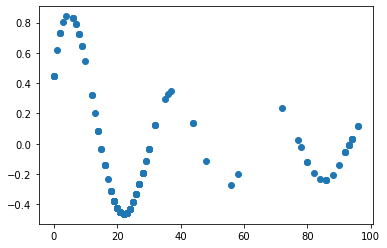

In [109]:
L = 100
V = [math.sin((site + 1) * 0.2) / math.sqrt((site + 1) * 0.2) for site in range(L)]

gamma = 0.05
beta = 0.01
beta_max = 1000000000.0
siteset=[]
Vset=[]
site = 0
step = 0
while beta < beta_max:
    site_new = (site + random.choice([-1, 1])) % L
    if random.uniform(0.0, 1.0) < math.exp(-beta * (V[site_new] - V[site])):
        site = site_new
        
    step += 1
    if step % 100 == 0:
        beta *= (1.0 + gamma)
        siteset.append(site)
        Vset.append(math.sin((site + 1) * 0.2) / math.sqrt((site + 1) * 0.2))
pylab.plot(siteset, Vset,'o')

In [219]:
L = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
sigma = 0.1
delta =0.001
n_steps = 100
n_move=0
for step in range(n_steps):
    a = random.choice(L)
    b = [a[0] + random.uniform(-delta, delta), a[1] + random.uniform(-delta, delta)]
    min_dist_sq = min((b[0] - c[0]) ** 2 + (b[1] - c[1]) ** 2 for c in L if c != a)
    box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
    if not (box_cond or min_dist_sq < 4.0 * sigma ** 2):
        a[:] = b
        n_move+=1
    print (step, L)
print (n_move/n_steps)

0 [[0.25, 0.25], [0.75, 0.25], [0.2496563193009664, 0.7507844828366941], [0.75, 0.75]]
1 [[0.24975278122278624, 0.25036548925004537], [0.75, 0.25], [0.2496563193009664, 0.7507844828366941], [0.75, 0.75]]
2 [[0.24975278122278624, 0.25036548925004537], [0.7490919094456098, 0.25056865246246995], [0.2496563193009664, 0.7507844828366941], [0.75, 0.75]]
3 [[0.24975278122278624, 0.25036548925004537], [0.7490919094456098, 0.25056865246246995], [0.2496563193009664, 0.7507844828366941], [0.7504875422204343, 0.7499138065548462]]
4 [[0.24975278122278624, 0.25036548925004537], [0.7491425747821182, 0.25127872832122966], [0.2496563193009664, 0.7507844828366941], [0.7504875422204343, 0.7499138065548462]]
5 [[0.24975278122278624, 0.25036548925004537], [0.7491425747821182, 0.25127872832122966], [0.2496563193009664, 0.7507844828366941], [0.7501337081680124, 0.7506344996269826]]
6 [[0.24975278122278624, 0.25036548925004537], [0.7491425747821182, 0.25127872832122966], [0.25021237604078095, 0.75122091218340

In [137]:
def energy(sigma, h, J):
    E = - h * sigma[0] - h * sigma[1] - J * sigma[0] * sigma[1]
    return E

beta = 1.0
h = 1.0
J = 0.0
nsteps = 10000
sigma = [1, 1]
for step in range(nsteps):
    site = random.choice([0, 1])
    sigma_new = sigma[:]
    sigma_new[site] *= (-1)
    delta_E = energy(sigma_new, h, J) - energy(sigma, h, J)
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        sigma = sigma_new[:]
    print(sigma)


[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, -1]
[-1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, -1]
[-1, -1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, -1]
[-1, 1]
[-1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1,

[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, -1]
[1, 1]
[1, -1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, -1]
[1, -1]
[1, -1]
[1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, -1]
[-1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[-1, -1]
[1, -1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1

[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[-1, -1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[-1, -1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[-1, -1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-

[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, -1]
[1, -1]
[1, -1]
[1, -1]
[-1, -1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[-1, -1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[-1, -1]
[1, -1]
[1, -1]
[-1, -1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1

[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, -1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[-1, 1]
[-1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1]
[1, 1

In [181]:
def energy(S):
    E = S[0] * S[1] - S[1] * S[2] + S[2] * S[3] + S[3] * S[4] - S[4] * S[0]
    return E

L = 5
S = [1] * L
beta = 0.0
nsteps = 100
for step in range(nsteps):
    k = random.randint(0, L - 1)
    S_new = S[:k] + [-S[k]] + S[k + 1:]
    delta_E = energy(S_new) - energy(S)
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S = S_new[:]
    if energy(S)==-3:
        print(S)

[1, 1, 1, -1, 1]
[1, 1, 1, -1, 1]
[1, -1, -1, 1, 1]
[-1, 1, 1, -1, 1]
[-1, 1, 1, -1, -1]
[1, 1, 1, -1, 1]
[1, -1, -1, 1, -1]
[1, -1, 1, -1, 1]
[1, -1, -1, -1, 1]
[1, -1, 1, -1, 1]
[1, -1, -1, 1, 1]
[1, -1, -1, 1, 1]
[1, -1, -1, 1, -1]
[-1, -1, -1, 1, -1]
[1, -1, -1, -1, 1]
[-1, -1, -1, 1, -1]
[-1, 1, -1, 1, -1]
[-1, 1, 1, 1, -1]
[1, -1, 1, -1, 1]
[-1, -1, -1, 1, -1]
[1, -1, -1, 1, 1]
[1, -1, -1, -1, 1]
[1, 1, 1, -1, 1]
[1, -1, -1, 1, -1]
[-1, -1, -1, 1, -1]


(array([0.04156635, 0.        , 0.04156635, 0.        , 0.        ,
        0.04156635, 0.04156635, 0.        , 0.        , 0.04156635,
        0.04156635, 0.08313271, 0.12469906, 0.20783176, 0.04156635,
        0.16626541, 0.16626541, 0.16626541, 0.16626541, 0.08313271,
        0.20783176, 0.16626541, 0.12469906, 0.33253082, 0.24939812,
        0.49879623, 0.33253082, 0.41566353, 0.54036258, 0.49879623,
        0.54036258, 0.29096447, 0.49879623, 0.99759246, 0.41566353,
        0.7897607 , 0.95602611, 0.66506164, 0.49879623, 1.03915881,
        0.95602611, 1.28855693, 0.99759246, 0.37409717, 1.33012328,
        0.8728934 , 0.91445976, 0.91445976, 1.08072517, 0.95602611,
        1.20542422, 0.95602611, 1.08072517, 0.95602611, 0.7897607 ,
        0.99759246, 0.7897607 , 1.03915881, 0.66506164, 0.7897607 ,
        0.99759246, 0.74819435, 0.8728934 , 0.91445976, 0.33253082,
        0.66506164, 0.83132705, 0.70662799, 0.33253082, 0.41566353,
        0.29096447, 0.62349529, 0.33253082, 0.33

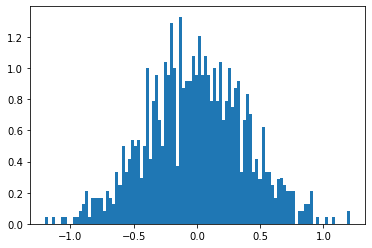

In [227]:
def sample_final_point(beta, N):
    sigma = math.sqrt(beta / float(N))
    xprev = 0.0
    for i in range(N):
        xnext = random.gauss(xprev, sigma)
        xprev = xnext
    return xnext

beta=0.15
x=[]
nsteps=1000
N=200
for i in range(nsteps):
    x.append(sample_final_point(beta, N))


pylab.hist(x,density=True,bins=100)

(array([0.0185875, 0.027475 , 0.0392375, 0.0553   , 0.       , 0.083075 ,
        0.1254125, 0.1884625, 0.285375 , 0.427075 ]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

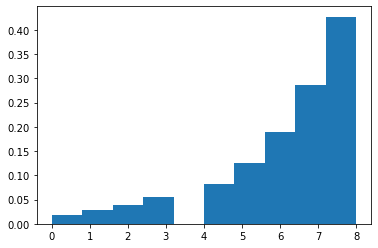

In [216]:
L = 9
b = 0.1
x = 0
pos=[]
nsteps = 100000
for step in range(nsteps):
    if random.uniform(0.0, 1.0) < 0.5 + b:
        dx = 1
    else:
        dx = -1
    if x + dx >= 0 and x + dx < L:
        x += dx
    pos.append(x)

pylab.hist(pos,density=True,bins=10)